## Facial Expression Classifier with CNN

This notebook corresponds to the dataset and training conditions described in the report in section  
**8) Dataset redefined into Negative and Positive classes, balanced, 2 classes**.  

In this notebook, the dataset was divided **before training** into two classes by merging "Happy" and "Surprise" into the **Positive** class and "Angry", "Fear", "Sad", and "Disgust" into the **Negative** class. After this division, the dataset was balanced by randomly removing excess images from the overrepresented class using terminal commands. As a result, the dataset contains an equal number of samples for **Positive** and **Negative**.  
(Terminal commands executed are not shown in the notebook.)



## Dataset Import and Pre-processing

The **class_weight** parameter was not used here, as the dataset had already been balanced beforehand.


In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator



import os

# Definisci le directory
train_dir = "/Users/irenesilvestro/Desktop/quinto anno uni/reti_neurali/pos_neg/train"
val_dir = "/Users/irenesilvestro/Desktop/quinto anno uni/reti_neurali/pos_neg/validation"
test_dir = "/Users/irenesilvestro/Desktop/quinto anno uni/reti_neurali/pos_neg/test"

# Funzione per contare gli elementi nelle sottocartelle
def count_images_in_subfolders(directory):
    if not os.path.exists(directory):
        print(f"La directory {directory} non esiste.")
        return
    
    print(f"\n Directory: {directory}")
    for subfolder in sorted(os.listdir(directory)):  # Ordina i nomi alfabeticamente
        subfolder_path = os.path.join(directory, subfolder)
        if os.path.isdir(subfolder_path):  # Controlla se è una cartella
            count = len(os.listdir(subfolder_path))  # Conta i file
            print(f"   {subfolder}: {count} immagini")

# Conta i file nelle sottocartelle di train, validation e test
count_images_in_subfolders(train_dir)
count_images_in_subfolders(val_dir)
count_images_in_subfolders(test_dir)

2025-02-11 20:36:07.978929: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



 Directory: /Users/irenesilvestro/Desktop/quinto anno uni/reti_neurali/pos_neg/train
   negative: 9088 immagini
   positive: 9088 immagini

 Directory: /Users/irenesilvestro/Desktop/quinto anno uni/reti_neurali/pos_neg/validation
   negative: 2605 immagini
   positive: 2605 immagini

 Directory: /Users/irenesilvestro/Desktop/quinto anno uni/reti_neurali/pos_neg/test
   negative: 1298 immagini
   positive: 1298 immagini


In [2]:
# Preprocessing del dataset
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#normalizzazione e data augumentation sul training set
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Random shift della larghezza delle immagini fino al 10%
    height_shift_range = 0.1,       # Random shift dell'altezza delle immagini fino al 10%
    horizontal_flip = True,         # Flip orizzontale delle immagini in modo casuale
    rescale = 1./255,               # Risacala il valore dei pixel tra 0 e 1 
)

#normalizzazione di validation set 
validation_datagen = ImageDataGenerator(
    rescale = 1./255,              
)

#normalizzazione di test set 
test_datagen = ImageDataGenerator(
    rescale = 1./255,               
)



In [3]:
# Caricamento del dataset 

#flow_from_directory() carica le immagini, preprocessate con ImageDataGenerator, li legge inoltre in ordine alfabetico 
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory che contiene i training data
    target_size = (48, 48),          # Per sicurezza ridimensioniammo tutte le immagini a 48x48 pixels
    batch_size = 64,                 # Impostiamo il numero di immagini per batch
    color_mode = "grayscale",        # Per sicurezza convertiamo le immagini in grayscale
    class_mode = "categorical",      # Impongo che le etichette delle immagini vengano convertite in one-hot encoding 
)

validation_generator = validation_datagen.flow_from_directory(
    directory = val_dir,            # Directory che contiene i validation data
    target_size = (48, 48), 
    batch_size = 64,                 
    color_mode = "grayscale",        
    class_mode = "categorical",   
)


test_generator = test_datagen.flow_from_directory(
    directory = test_dir,            
    target_size = (48, 48),          
    batch_size = 64,               
    color_mode = "grayscale",      
    class_mode = "categorical",     
)

Found 18176 images belonging to 2 classes.
Found 5210 images belonging to 2 classes.
Found 2596 images belonging to 2 classes.


## Network Architecture Definition and Training Setup


In [ ]:
# Definisco il modello 

from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf 


model = Sequential()

# I Convolutional layer con 32 filters, 3x3 kernel size e relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# I Batch normalization layer
model.add(BatchNormalization())
# II Convolutional layer con 64 filters, 3x3 kernel size e relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# II Batch normalization layer
model.add(BatchNormalization())
# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer con 0.25 dropout rate
model.add(Dropout(0.25))

# III Convolutional layer con 128 filters, 3x3 kernel size e relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# III Batch normalization layer
model.add(BatchNormalization())
# IV Convolutional layer con 128 filters, 3x3 kernel size e relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# IV Batch normalization layer
model.add(BatchNormalization())
# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))


# V Convolutional layer con 256 filters, 3x3 kernel size e relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# V Batch normalization layer
model.add(BatchNormalization())
# VI Convolutional layer con 256 filters, 3x3 kernel size e relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# VI Batch normalization layer
model.add(BatchNormalization())
# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten converte l' output degli strati convoluzionali
model.add(Flatten())
# Dense layer con 256 neuroni e relu activation function
model.add(Dense(256, activation='relu'))
# VII Batch normalization layer
model.add(BatchNormalization())
# Dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Dense layer con 2 neuroni e softmax come activation function
model.add(Dense(2, activation='softmax'))


# Compila il modello con  categorical cross-entropy loss, adam optimizer, learning rate fissato e accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])



In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Definisco per sicurezza il callback per salvare i pesi corrispondenti al miglior valore di val_accuracy
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights_prova_8.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Avvio la fase di training
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=40,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)



#Salva l'intero modello dell'ultima epoca (perchè ho visto che è comunque il migliore che si riesce a fare)
model.save('model_complete_prova_8.h5')  


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.5266 - loss: 1.2180
Epoch 1: val_accuracy improved from -inf to 0.50096, saving model to model_weights_prova_8.weights.h5
284/284 ━━━━━━━━━━━━━━━━━━━━ 190s 641ms/step - accuracy: 0.5266 - loss: 1.2177 - val_accuracy: 0.5010 - val_loss: 0.7595
Epoch 2/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.5454 - loss: 1.0130
Epoch 2: val_accuracy improved from 0.50096 to 0.56027, saving model to model_weights_prova_8.weights.h5
284/284 ━━━━━━━━━━━━━━━━━━━━ 200s 705ms/step - accuracy: 0.5454 - loss: 1.0129 - val_accuracy: 0.5603 - val_loss: 0.6936
Epoch 3/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.5596 - loss: 0.9229
Epoch 3: val_accuracy improved from 0.56027 to 0.60672, saving model to model_weights_prova_8.weights.h5
284/284 ━━━━━━━━━━━━━━━━━━━━ 191s 674ms/step - accuracy: 0.5596 - loss: 0.9228 - val_accuracy: 0.6067 - val_loss: 0.6822
Epoch 4/40
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accur

## Loss and Accuracy on training and validation set

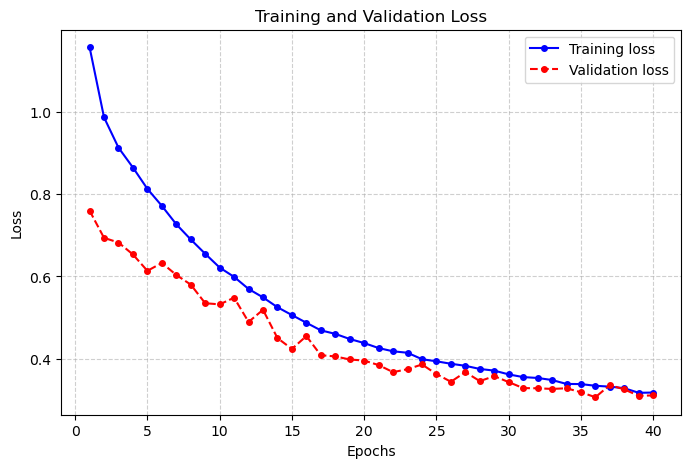

In [8]:
# Plot di Loss e Accuracy in funzione del numero di epoche sia del training che validation set

import matplotlib.pyplot as plt

# Estrazione dei dati
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Creazione del plot
plt.figure(figsize=(8, 5))  # Imposta la dimensione della figura
plt.plot(epochs, train_loss, 'bo-', markersize=4, label='Training loss')  # Linea blu con cerchi
plt.plot(epochs, val_loss, 'r--o', markersize=4, label='Validation loss')  # Linea rossa tratteggiata con cerchi

# Aggiunta griglia
plt.grid(True, linestyle='--', alpha=0.6)

# Titoli e assi
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Mostra il grafico
plt.show()

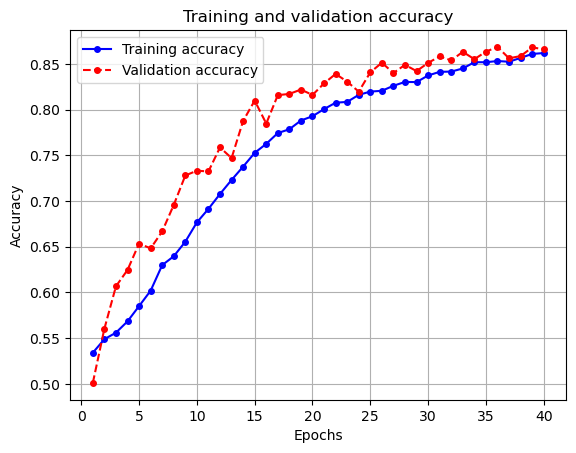

In [9]:
import matplotlib.pyplot as plt

# Plot dell'accuracy del train e validation set
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo-', markersize=4, label='Training accuracy')  # Linea blu con cerchi più piccoli
plt.plot(epochs, val_acc, 'r--o', markersize=4, label='Validation accuracy')  # Linea blu tratteggiata con cerchi più piccoli
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  
plt.show()

## Model Performance Evaluation:
**-Confusion Matrix  
-Precision, Recall, f1-score  
-ROC curves  
-Saliency Map**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━

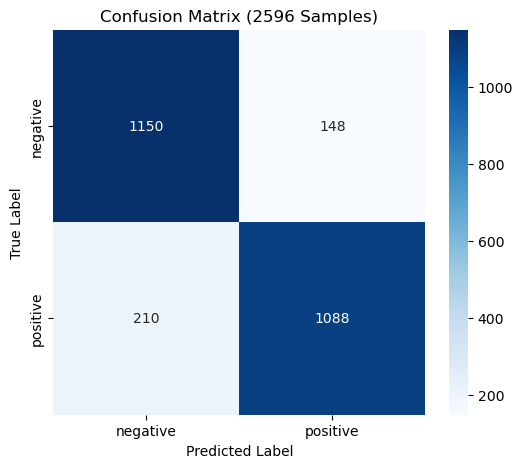

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import load_model
import os

model = load_model('model_complete_prova_8.h5')


# Funzione per ottenere le predizioni del modello sui dati di test
def get_predictions_from_generator(model, test_generator, max_samples=2596):
    true_labels = []
    pred_labels = []
    
    count = 0
    for img_batch, label_batch in test_generator:
        if count >= max_samples:
            break
        
        batch_size = img_batch.shape[0]
        if count + batch_size > max_samples:
            batch_size = max_samples - count  # Adjust batch size to not exceed limit
        
        predictions = model.predict(img_batch[:batch_size])  # Ottieni le previsioni
        pred_labels.extend(np.argmax(predictions, axis=1))  # Converti in classi predette
        true_labels.extend(np.argmax(label_batch[:batch_size], axis=1))  # Ottieni le classi reali
        
        count += batch_size
    
    return np.array(true_labels), np.array(pred_labels)

# Ottieni le predizioni e le etichette vere (fino a 2596 campioni)
true_labels, pred_labels = get_predictions_from_generator(model, test_generator, max_samples=2596)



# Calcola la Confusion Matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Ottieni i nomi delle classi dal generatore
class_names = list(test_generator.class_indices.keys())

# Visualizza la Confusion Matrix 
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (2596 Samples)")
plt.show()


In [6]:
# Stampa il report di classificazione con metriche di valutazione (precision, recall, F1-score)
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report (2596 Samples):")
print(classification_report(true_labels, pred_labels, target_names=class_names))


from sklearn.metrics import accuracy_score
# Accuracy finale del modello 
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Accuracy: {accuracy:.4f}")

from sklearn.metrics import precision_score

# Precision (media semplice tra le classi)
precision = precision_score(true_labels, pred_labels, average="macro")


print(f"Precision : {precision:.4f}")



Classification Report (2596 Samples):
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      1298
    positive       0.88      0.84      0.86      1298

    accuracy                           0.86      2596
   macro avg       0.86      0.86      0.86      2596
weighted avg       0.86      0.86      0.86      2596

Accuracy: 0.8621
Precision : 0.8629


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


/var/folders/gq/bvv781yn5vx6lj6h56v__my80000gn/T/ipykernel_55376/1620671827.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


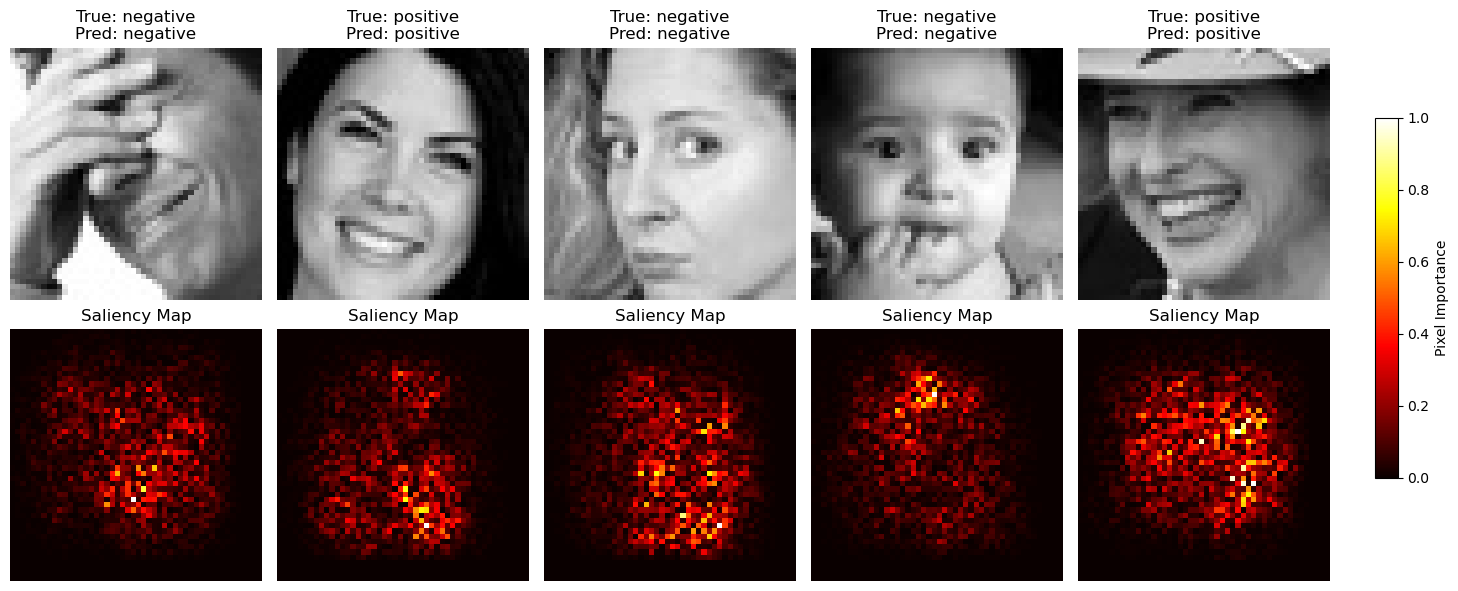

In [6]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Carica il modello salvato
model = load_model('model_complete_prova_8.h5')

# Ottieni i nomi delle classi dal test_generator
class_names = list(test_generator.class_indices.keys())

# Funzione per caricare 5 immagini casuali dal test set
def load_random_images_from_full_testset(test_generator, num_images=5):
    total_samples = test_generator.samples  
    batch_size = test_generator.batch_size  

    random_indices = random.sample(range(total_samples), num_images)

    images = []
    true_labels = []

    for random_index in random_indices:
        batch_index = random_index // batch_size  
        inside_batch_index = random_index % batch_size  

        img_batch, label_batch = test_generator.__getitem__(batch_index)

        img_array = img_batch[inside_batch_index]
        true_label = np.argmax(label_batch[inside_batch_index])

        images.append(img_array)
        true_labels.append(true_label)

    return np.array(images), np.array(true_labels)

# Funzione per calcolare la saliency map
def compute_saliency_map(model, img_array, class_index):
    img_array = tf.convert_to_tensor(img_array)  

    with tf.GradientTape() as tape:
        tape.watch(img_array)  
        predictions = model(img_array)  
        loss = predictions[:, class_index]  

    gradient = tape.gradient(loss, img_array)
    saliency_map = tf.reduce_max(tf.abs(gradient), axis=-1)[0]
    saliency_map = saliency_map.numpy()  

    # Normalizzazione della saliency map tra 0 e 1
    saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map) + 1e-8)

    return saliency_map

# Seleziona 5 immagini casuali dal test set
img_arrays, true_labels = load_random_images_from_full_testset(test_generator, num_images=5)

# Crea le previsioni per le 5 immagini
predictions = model.predict(img_arrays)
predicted_labels = np.argmax(predictions, axis=1)

# Calcola la saliency map per ciascuna immagine
saliency_maps = [compute_saliency_map(model, np.expand_dims(img, axis=0), pred) 
                 for img, pred in zip(img_arrays, predicted_labels)]

# Visualizza le immagini e le saliency maps
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    # Immagine originale
    axes[0, i].imshow(img_arrays[i].squeeze(), cmap='gray')
    axes[0, i].set_title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
    axes[0, i].axis('off')

    # Saliency Map con barra colore
    saliency_plot = axes[1, i].imshow(saliency_maps[i], cmap='hot', vmin=0, vmax=1)  # 🔹 Normalizzazione applicata
    axes[1, i].set_title("Saliency Map")
    axes[1, i].axis('off')

# Aggiungi la colorbar a destra della figura
cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
fig.colorbar(saliency_plot, cax=cbar_ax, label="Pixel Importance")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━

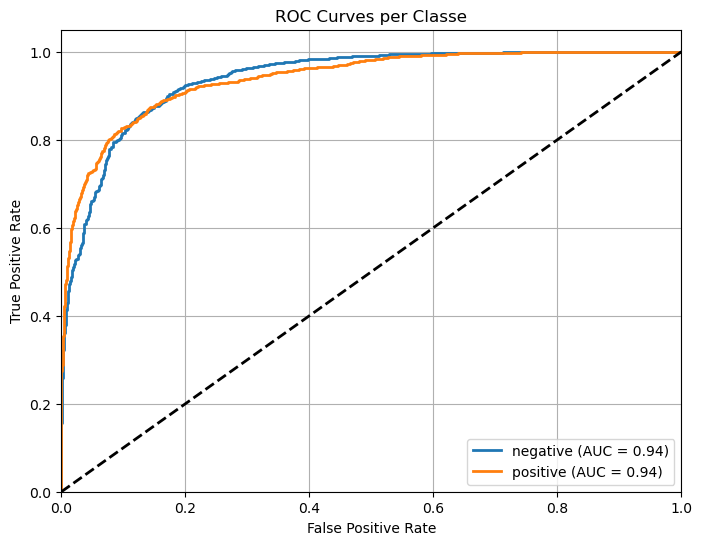

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import tensorflow as tf
from tensorflow.keras.models import load_model

# Carica il modello salvato
model = load_model('model_complete_prova_8.h5')

# Funzione per ottenere le predizioni
def get_predictions_from_generator(model, test_generator, max_samples=1000):
    true_labels = []
    pred_probs = []  # Probabilità invece delle classi predette
    
    count = 0
    for img_batch, label_batch in test_generator:
        if count >= max_samples:
            break
        
        batch_size = img_batch.shape[0]
        if count + batch_size > max_samples:
            batch_size = max_samples - count  
        
        predictions = model.predict(img_batch[:batch_size])  # Probabilità di ogni classe
        pred_probs.extend(predictions)  
        true_labels.extend(label_batch[:batch_size])  # Etichette reali
        
        count += batch_size
    
    return np.array(true_labels), np.array(pred_probs)

# Ottieni le etichette vere e le probabilità predette
true_labels, pred_probs = get_predictions_from_generator(model, test_generator, max_samples=2596)

# Binarizza le etichette reali (necessario per ROC curve multi-classe)
n_classes = pred_probs.shape[1]  # Numero di classi nel modello
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))

# Colori per ogni classe
colors = sns.color_palette("tab10", n_classes)

# Ottieni i nomi delle classi dal test_generator
class_names = list(test_generator.class_indices.keys())

# Disegna le ROC curve
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], pred_probs[:, i])  # Calcola i valori FPR (False Positive Rate) e TPR (True Positive Rate)
    roc_auc = auc(fpr, tpr)  # Area sotto la curva (AUC)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

# Linea diagonale (caso randomico)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Stile del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Classe")
plt.legend(loc="lower right")
plt.grid(True)

# Mostra il grafico
plt.show()


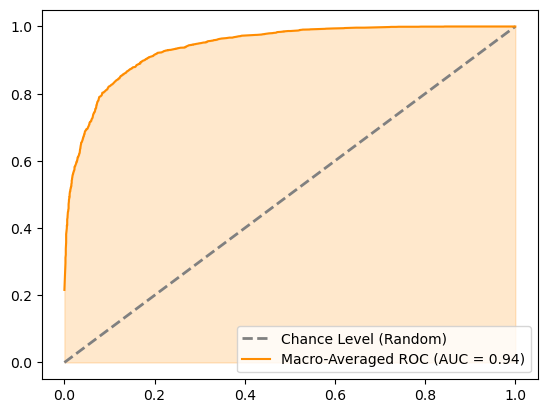

In [13]:
from sklearn.metrics import auc
import numpy as np

# Calcola la Macro-Averaged ROC

# Estrae e unisce tutti i valori unici di False Positive Rate (FPR) dalle curve ROC di ogni classe
all_fpr = np.unique(np.concatenate([roc_curve(true_labels_bin[:, i], pred_probs[:, i])[0] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], pred_probs[:, i])
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpola le TPR su tutti i FPR

mean_tpr /= n_classes  # Media delle curve ROC
macro_auc = auc(all_fpr, mean_tpr)

# Disegna la bisettrice casuale (chance level)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Chance Level (Random)")

# Disegna la Macro-Averaged ROC 
plt.plot(all_fpr, mean_tpr, color="darkorange", linestyle="-", linewidth=1.5, label=f"Macro-Averaged ROC (AUC = {macro_auc:.2f})")  # Linea più sottile
plt.fill_between(all_fpr, mean_tpr, alpha=0.2, color="darkorange")  

plt.legend(loc="lower right")  